In [3]:
import os
import sys
import pandas as pd
import datetime

import pathlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import importlib


from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import callbacks  

# project specific
sys.path.append('../src')
from utils import data_handler
from utils import benchmark
from utils import visualisation

from utils.models import cnn_encoder



import matplotlib.pyplot as plt
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go
import scipy


pd.options.display.width = 1000


%load_ext tensorboard
!rm -rf ../workfiles/logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'rm' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [28]:
importlib.reload(data_handler) # to allow modification of the script without restarting the whole session

absolute_path = "c:/thesis/data/quant"
metadata_path = "c:/thesis/METADATA_200123.xlsx"
absolute_path = "c:/thesis/data/cancer"

data, _, _, _ = data_handler.generate_dataset_cancer(
    path = absolute_path,
    log1p = False,
    min_max = False)

loading samples...
loaded 2259 / 2259 samples
number of genes selected :  60660
number of genes selected :  60660
shape of the dataset : (2259, 60660)
number of seq in the dataset : 2259


In [29]:
data = np.concatenate(list(data.as_numpy_iterator()), axis=0)


In [30]:
MAD = scipy.stats.median_abs_deviation(data)
print("min MAD",min(MAD))
print("max MAD",max(MAD))

threshold = 2
ceiling = 100

min MAD 0.0
max MAD 285733.0


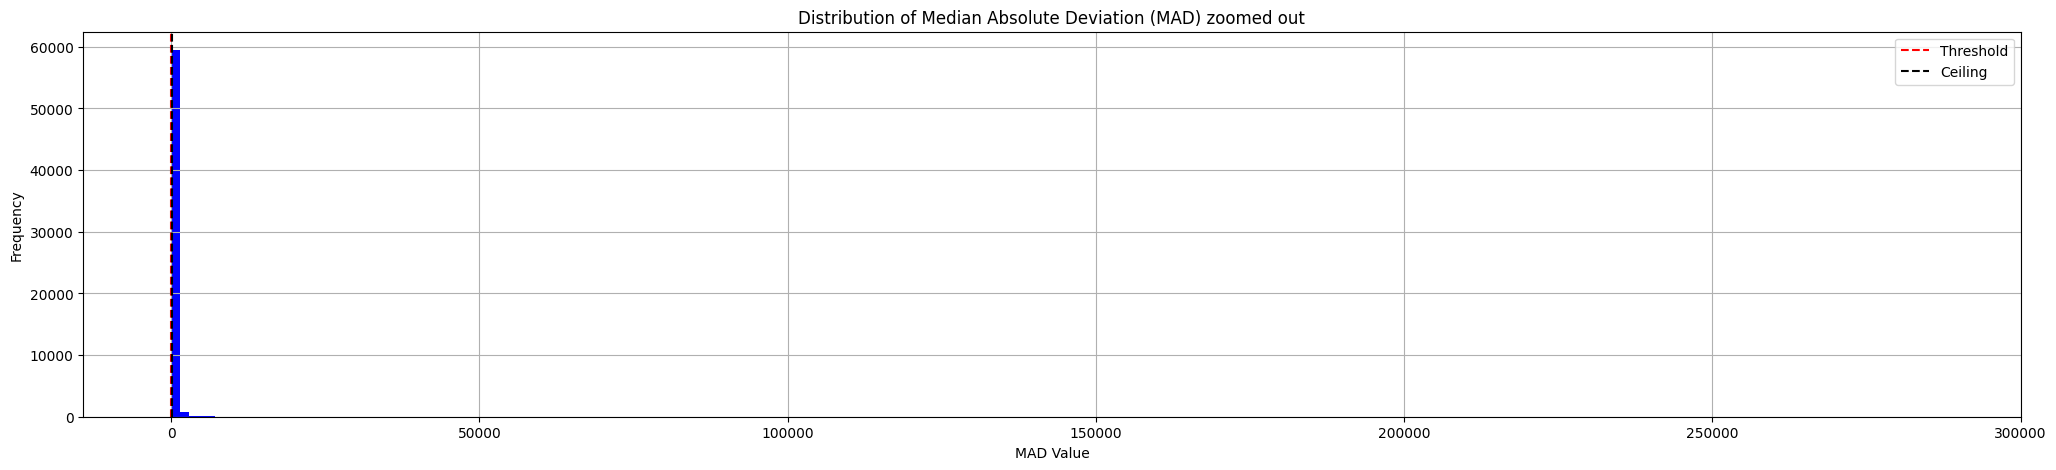

In [31]:
plt.figure(figsize=(25, 5))
plt.hist(MAD, bins=200, color='blue')

plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.axvline(ceiling, color='black', linestyle='--', label='Ceiling')

plt.title('Distribution of Median Absolute Deviation (MAD) zoomed out')
plt.xlabel('MAD Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

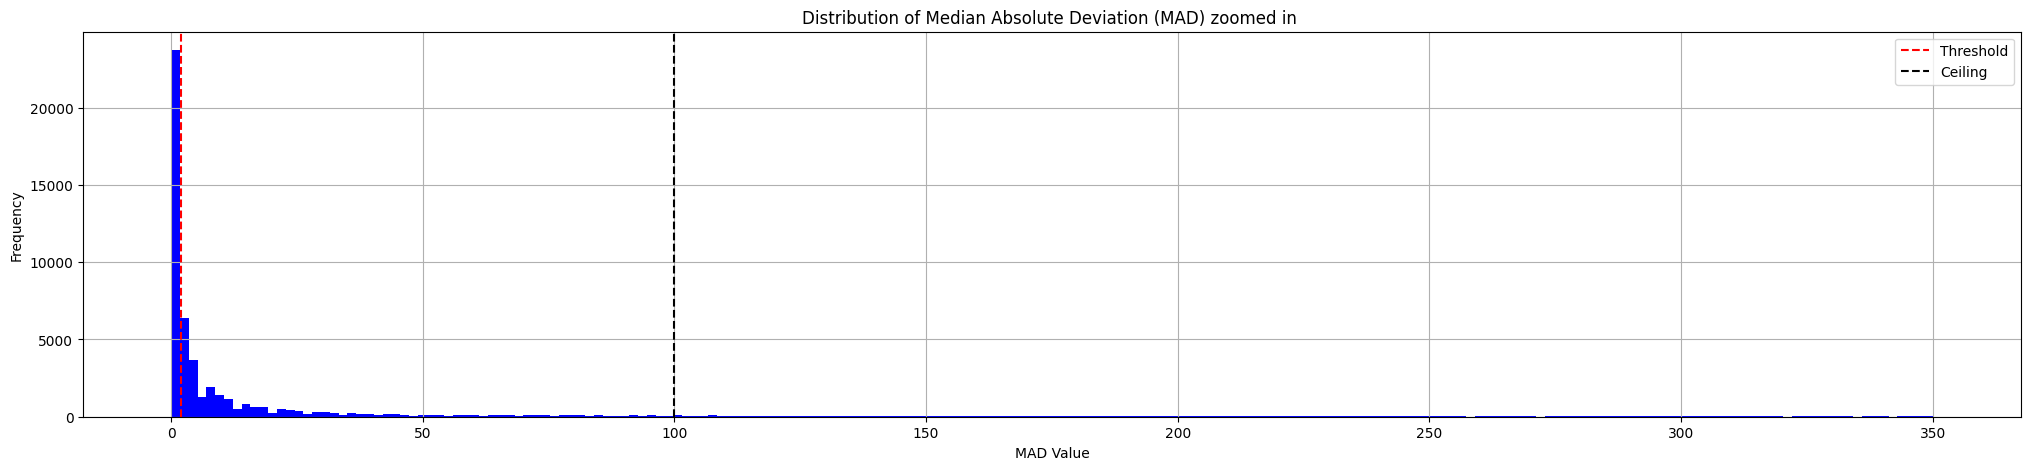

In [32]:
threshold = 2
ceiling = 100
plt.figure(figsize=(25, 5))
plt.hist(MAD, bins=200, color='blue', range = [0,350])

plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.axvline(ceiling, color='black', linestyle='--', label='Ceiling')

plt.title('Distribution of Median Absolute Deviation (MAD) zoomed in ')
plt.xlabel('MAD Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()